Valera, Jan Denver

# Assignment 2
The goal of this assignment is to design a Colonel Blotto strategy that consistently outperforms a random allocation strategy across multiple simulations. This would test your ability to setup a monte carlo simulation for modelling:
1. The mechanisms of the game
2. The different strategies
3. The performance of the strategies vs a baseline


### Instructions:
1. Initialize the Game Environment. There are 5 battlefronts and you have 100 soldiers to allocate. Your task is to deploy soldiers across these battlefronts to win as many as possible. A front is won if you have more soldiers than your opponent.
2. Implement a Random Strategy for the Opponent. Create a function that randomly distributes 20 soldiers across the 5 battlefronts.
3. Develop Your Strategy. You need to implement atleast two strategic models with at least one model that consistently beats the random opponent.
4. Evaluate Your Strategy. Simulate at least 100 games to measure the effectiveness of your strategy. Track the number of wins, losses, and ties.

### Questions:
1. Which allocation strategy led to the most victories?
2. Was focusing on specific fronts more effective than spreading thin?
3. Did randomness from the opponent make it hard to predict?
4. How would you adapt your strategy if the opponent also learned from past rounds?
5. What would you change if you played against a strategic (non-random) opponent?

In [1]:
import numpy as np
from math import ceil
from collections import defaultdict
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Initialize Game

In [2]:
def initialize_game(P1_allocation, P2_allocation, num_fronts=5, total_soldiers=100):
    """Simulates a single Colonel Blotto game between two players.

    In the Colonel Blotto game, two players allocate a fixed number of soldiers across
    multiple battlefronts. Each front is won by the player with more soldiers on that front.
    The overall winner is determined by the number of fronts won.

    Args:
        P1_allocation (list): Player 1's soldier allocations across battlefronts.
        P2_allocation (list): Player 2's soldier allocations across battlefronts.
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers each player allocates. Defaults to 100.

    Returns:
        tuple: A tuple containing:
            - int: Number of fronts won by Player 1.
            - int: Number of fronts won by Player 2.
            - str: Game outcome ('P1 WINS', 'P2 WINS', or 'DRAW').
    """
    
    if len(P1_allocation) != num_fronts or len(P2_allocation) != num_fronts:
        raise ValueError(f"Allocations must have {num_fronts} fronts.")
    if sum(P1_allocation) != total_soldiers or sum(P2_allocation) != total_soldiers:
        raise ValueError(f"Allocations must sum to {total_soldiers} soldiers.")
    if any(x < 0 for x in P1_allocation) or any(x < 0 for x in P2_allocation):
        raise ValueError("Allocations must be non-negative.")

    # print(P1_allocation)
    # print(P2_allocation)
    
    P1_front_wins = 0
    P2_front_wins = 0
    for i in range(num_fronts):
        P1_soldiers = P1_allocation[i]
        P2_soldiers = P2_allocation[i]
        if P1_soldiers > P2_soldiers:
            P1_front_wins += 1
        elif P2_soldiers > P1_soldiers:
            P2_front_wins += 1

    if P1_front_wins > P2_front_wins:
        game_outcome = "P1 WINS"
    elif P2_front_wins > P1_front_wins:
        game_outcome = "P2 WINS"
    else:
        game_outcome = "DRAW"

    return P1_front_wins, P2_front_wins, game_outcome

help(initialize_game)

P1_allocation = [35, 35, 0, 0, 30]
P2_allocation = [30, 10, 30, 5, 25]

print(f"Sample Game: {P1_allocation} vs {P2_allocation}")
initialize_game(P1_allocation=P1_allocation,
                P2_allocation=P2_allocation)

Help on function initialize_game in module __main__:

initialize_game(P1_allocation, P2_allocation, num_fronts=5, total_soldiers=100)
    Simulates a single Colonel Blotto game between two players.

    In the Colonel Blotto game, two players allocate a fixed number of soldiers across
    multiple battlefronts. Each front is won by the player with more soldiers on that front.
    The overall winner is determined by the number of fronts won.

    Args:
        P1_allocation (list): Player 1's soldier allocations across battlefronts.
        P2_allocation (list): Player 2's soldier allocations across battlefronts.
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers each player allocates. Defaults to 100.

    Returns:
        tuple: A tuple containing:
            - int: Number of fronts won by Player 1.
            - int: Number of fronts won by Player 2.
            - str: Game outcome ('P1 WINS', 'P2 WINS', 

(3, 2, 'P1 WINS')

# Strategies

In [3]:
def random_strategy(num_fronts=5, total_soldiers=100):
    """Generates a random allocation of soldiers across battlefronts for a Colonel Blotto game.

    Uses a multinomial distribution to randomly distribute the total number of soldiers
    across the specified number of battlefronts, ensuring allocations are non-negative
    integers that sum to the total number of soldiers.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100.

    Returns:
        list: A list of non-negative integers representing soldier allocations across
              battlefronts, summing to total_soldiers.
    """
    allocations = np.random.multinomial(total_soldiers, [1/num_fronts]*num_fronts)
    
    return allocations.tolist()

help(random_strategy)

print("Sample Allocations for Random Strategy:")
for i in range (11):
    print(random_strategy())

Help on function random_strategy in module __main__:

random_strategy(num_fronts=5, total_soldiers=100)
    Generates a random allocation of soldiers across battlefronts for a Colonel Blotto game.

    Uses a multinomial distribution to randomly distribute the total number of soldiers
    across the specified number of battlefronts, ensuring allocations are non-negative
    integers that sum to the total number of soldiers.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100.

    Returns:
        list: A list of non-negative integers representing soldier allocations across
              battlefronts, summing to total_soldiers.

Sample Allocations for Random Strategy:
[17, 13, 19, 22, 29]
[14, 20, 20, 27, 19]
[22, 16, 21, 26, 15]
[24, 18, 14, 18, 26]
[19, 23, 16, 20, 22]
[17, 18, 20, 22, 23]
[25, 18, 15, 16, 26]
[25, 22, 17, 18, 18]
[28, 16, 24, 11, 21]
[15, 18, 23, 26,

In [4]:
def sequential_random_strategy(num_fronts=5, total_soldiers=100):
    """Generates a sequential random allocation of soldiers across battlefronts for a Colonel Blotto game.

    Soldiers are allocated sequentially to each battlefront by randomly selecting a number of soldiers
    from the remaining pool for each front (except the last), ensuring non-negative integers.
    The remaining soldiers are assigned to the final front, and then all allocations are shuffled
    to randomize their positions.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100.

    Returns:
        list: A shuffled list of non-negative integers representing soldier allocations across
              battlefronts, summing to total_soldiers.
    """
    allocations = []
    remaining_soldiers = total_soldiers
    
    for i in range(num_fronts - 1):
        soldiers = np.random.randint(0, remaining_soldiers + 1)
        allocations.append(soldiers)
        remaining_soldiers -= soldiers
    
    allocations.append(remaining_soldiers)
    np.random.shuffle(allocations)
    
    return allocations

help(sequential_random_strategy)

print("Sample Allocations for Sequential Random Strategy:")
for i in range (11):
    print(sequential_random_strategy())

Help on function sequential_random_strategy in module __main__:

sequential_random_strategy(num_fronts=5, total_soldiers=100)
    Generates a sequential random allocation of soldiers across battlefronts for a Colonel Blotto game.

    Soldiers are allocated sequentially to each battlefront by randomly selecting a number of soldiers
    from the remaining pool for each front (except the last), ensuring non-negative integers.
    The remaining soldiers are assigned to the final front, and then all allocations are shuffled
    to randomize their positions.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100.

    Returns:
        list: A shuffled list of non-negative integers representing soldier allocations across
              battlefronts, summing to total_soldiers.

Sample Allocations for Sequential Random Strategy:
[0, 1, 57, 38, 4]
[6, 3, 8, 78, 5]
[0, 0, 3, 1, 96]
[

In [5]:
def balanced_strategy(num_fronts=5, total_soldiers=100):
    """Allocates soldiers as evenly as possible across battlefronts for a Colonel Blotto game, with random shuffling.

    Divides the total soldiers by the number of fronts using integer division to assign a base
    number of soldiers to each front. Any remaining soldiers are distributed by adding one soldier
    to some fronts, ensuring the total sum equals total_soldiers. The allocations are then
    randomly shuffled to randomize their positions across fronts.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100.

    Returns:
        list: A list of integers representing soldier allocations for each battlefront,
              with values differing by at most one, summing exactly to total_soldiers,
              and randomly shuffled.
    """
    base = total_soldiers // num_fronts
    remainder = total_soldiers % num_fronts
    allocations = [base + 1 if i < remainder else base for i in range(num_fronts)]
    np.random.shuffle(allocations)
    
    return allocations

help(balanced_strategy)

print("Sample Allocations for Balanced Strategy:")
for i in range (11):
    print(balanced_strategy())

Help on function balanced_strategy in module __main__:

balanced_strategy(num_fronts=5, total_soldiers=100)
    Allocates soldiers as evenly as possible across battlefronts for a Colonel Blotto game, with random shuffling.

    Divides the total soldiers by the number of fronts using integer division to assign a base
    number of soldiers to each front. Any remaining soldiers are distributed by adding one soldier
    to some fronts, ensuring the total sum equals total_soldiers. The allocations are then
    randomly shuffled to randomize their positions across fronts.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100.

    Returns:
        list: A list of integers representing soldier allocations for each battlefront,
              with values differing by at most one, summing exactly to total_soldiers,
              and randomly shuffled.

Sample Allocations for Bala

In [6]:
def minmaxone_strategy(num_fronts=5, total_soldiers=100):
    """Generates a minmaxone allocation for a Colonel Blotto game, with random shuffling.

    Allocates one soldier to each battlefront except one, which receives the remaining
    soldiers (total_soldiers - num_fronts + 1). The allocations are then randomly shuffled
    to randomize the position of the front with the most soldiers.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100.

    Returns:
        list: A list of integers with one front allocated total_soldiers - num_fronts + 1
              soldiers, the rest allocated 1 soldier each, summing to total_soldiers,
              and randomly shuffled.
    """
    
    allocations = [1] * num_fronts
    allocations[0] = allocations[0] + total_soldiers - num_fronts
    np.random.shuffle(allocations)
    
    return allocations

help(minmaxone_strategy)

print("Sample Allocations for MinMaxOne Strategy:")
for i in range (11):
    print(minmaxone_strategy())

Help on function minmaxone_strategy in module __main__:

minmaxone_strategy(num_fronts=5, total_soldiers=100)
    Generates a minmaxone allocation for a Colonel Blotto game, with random shuffling.

    Allocates one soldier to each battlefront except one, which receives the remaining
    soldiers (total_soldiers - num_fronts + 1). The allocations are then randomly shuffled
    to randomize the position of the front with the most soldiers.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100.

    Returns:
        list: A list of integers with one front allocated total_soldiers - num_fronts + 1
              soldiers, the rest allocated 1 soldier each, summing to total_soldiers,
              and randomly shuffled.

Sample Allocations for MinMaxOne Strategy:
[1, 96, 1, 1, 1]
[1, 96, 1, 1, 1]
[1, 96, 1, 1, 1]
[1, 96, 1, 1, 1]
[96, 1, 1, 1, 1]
[1, 1, 1, 1, 96]
[1, 1, 1, 96,

In [7]:
def focused_strategy(num_fronts=5, total_soldiers=100):
    """Allocates soldiers to three randomly selected battlefronts for a 5-front, 100-soldier Colonel Blotto game.

    Assigns 33, 33, and 34 soldiers to three randomly chosen battlefronts, with zero soldiers
    allocated to the remaining two fronts. This strategy is designed specifically for a game
    with 5 battlefronts and 100 soldiers, and parameters are provided for compatibility but ignored.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5. Ignored in computation.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100. Ignored in computation.

    Returns:
        list: A list of integers with three randomly selected fronts allocated [33, 33, 34],
              summing to 100, and zeros elsewhere.

    """
    allocations = np.zeros(num_fronts, dtype=int)
    priority_fronts = np.random.choice(num_fronts, 3, replace=False)
    allocations[priority_fronts] = [33, 33, 34]
    
    return allocations.tolist()

help(focused_strategy)

print("Sample Allocations for 3-Focused Strategy:")
for i in range (11):
    print(focused_strategy())

Help on function focused_strategy in module __main__:

focused_strategy(num_fronts=5, total_soldiers=100)
    Allocates soldiers to three randomly selected battlefronts for a 5-front, 100-soldier Colonel Blotto game.

    Assigns 33, 33, and 34 soldiers to three randomly chosen battlefronts, with zero soldiers
    allocated to the remaining two fronts. This strategy is designed specifically for a game
    with 5 battlefronts and 100 soldiers, and parameters are provided for compatibility but ignored.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5. Ignored in computation.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100. Ignored in computation.

    Returns:
        list: A list of integers with three randomly selected fronts allocated [33, 33, 34],
              summing to 100, and zeros elsewhere.

Sample Allocations for 3-Focused Strategy:
[33, 33, 0, 0, 34]
[0, 0, 33, 33, 34]
[33, 34, 33, 0, 0]
[34, 33, 0, 0, 3

In [8]:
def focused_equal4(num_fronts=5, total_soldiers=100):
    """Allocates 25 soldiers to four randomly selected battlefronts for a 5-front, 100-soldier Colonel Blotto game.

    Assigns 25 soldiers to each of four randomly chosen battlefronts, with zero soldiers allocated
    to the remaining front. This strategy is designed specifically for a game with 5 battlefronts
    and 100 soldiers, and parameters are provided for compatibility but ignored in computation.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5. Ignored in computation.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100. Ignored in computation.

    Returns:
        list: A list of integers with four randomly selected fronts allocated 25 soldiers each,
              summing to 100, and zero elsewhere.
    """
    allocations = [0] * num_fronts
    priority_fronts = np.random.choice(num_fronts, 4, replace=False).tolist()
    for front in priority_fronts:
        allocations[front] = 25
        
    return allocations

help(focused_equal4)

print("Sample Allocations for 4-Focused Equal Strategy:")
for i in range (11):
    print(focused_equal4())

Help on function focused_equal4 in module __main__:

focused_equal4(num_fronts=5, total_soldiers=100)
    Allocates 25 soldiers to four randomly selected battlefronts for a 5-front, 100-soldier Colonel Blotto game.

    Assigns 25 soldiers to each of four randomly chosen battlefronts, with zero soldiers allocated
    to the remaining front. This strategy is designed specifically for a game with 5 battlefronts
    and 100 soldiers, and parameters are provided for compatibility but ignored in computation.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5. Ignored in computation.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100. Ignored in computation.

    Returns:
        list: A list of integers with four randomly selected fronts allocated 25 soldiers each,
              summing to 100, and zero elsewhere.

Sample Allocations for 4-Focused Equal Strategy:
[25, 25, 0, 25, 25]
[0, 25, 25, 25, 25]
[0, 25, 25, 25, 25]
[0

In [9]:
def focused_random4(num_fronts=5, total_soldiers=100):
    """Randomly allocates 100 soldiers to four randomly selected battlefronts for a 5-front, 100-soldier Colonel Blotto game.

    Uses a multinomial distribution to allocate 96 soldiers across four randomly chosen battlefronts,
    adding 1 soldier to each to ensure non-zero allocations, with zero soldiers allocated to the
    remaining front. This strategy is designed specifically for a game with 5 battlefronts and
    100 soldiers, and parameters are provided for compatibility but ignored in computation.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5. Ignored in computation.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100. Ignored in computation.

    Returns:
        list: A list of integers with four randomly selected fronts allocated non-zero soldiers
              summing to 100, and zero elsewhere.
    """
    allocations = [0] * num_fronts
    priority_fronts = np.random.choice(num_fronts, 4, replace=False).tolist()
    front_allocations = np.random.multinomial(n=total_soldiers - 4, pvals=[0.25, 0.25, 0.25, 0.25]) + 1
    for front, soldiers in zip(priority_fronts, front_allocations):
        allocations[front] = soldiers
        
    return allocations

help(focused_random4)

print("Sample Allocations for 4-Focused Random Strategy:")
for i in range (11):
    print(focused_random4())

Help on function focused_random4 in module __main__:

focused_random4(num_fronts=5, total_soldiers=100)
    Randomly allocates 100 soldiers to four randomly selected battlefronts for a 5-front, 100-soldier Colonel Blotto game.

    Uses a multinomial distribution to allocate 96 soldiers across four randomly chosen battlefronts,
    adding 1 soldier to each to ensure non-zero allocations, with zero soldiers allocated to the
    remaining front. This strategy is designed specifically for a game with 5 battlefronts and
    100 soldiers, and parameters are provided for compatibility but ignored in computation.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5. Ignored in computation.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100. Ignored in computation.

    Returns:
        list: A list of integers with four randomly selected fronts allocated non-zero soldiers
              summing to 100, and zero elsewhere.

Sample

In [10]:
def random_prioritized_strategy(num_fronts=5, total_soldiers=100):
    """Allocates soldiers to 2-4 randomly prioritized battlefronts for a 5-front, 100-soldier Colonel Blotto game.

    Randomly selects 2 to 4 fronts to receive high allocations (30 to 50 soldiers each, if possible),
    with any remaining soldiers distributed randomly to non-prioritized fronts. The sum of allocations
    equals 100. This strategy is designed for a game with 5 battlefronts and 100 soldiers, with
    parameters provided for compatibility but used in computation for flexibility.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100.

    Returns:
        list: A list of non-negative integers with 2-4 randomly selected fronts receiving high
              allocations (30-50 soldiers if possible), and remaining soldiers allocated to other
              fronts, summing to total_soldiers.
    """
    num_priority = np.random.randint(2, 5)
    priority_fronts = np.random.choice(num_fronts, num_priority, replace=False)
    allocations = [0] * num_fronts
    remaining_soldiers = total_soldiers
    
    for front in priority_fronts:
        lower_bound = 30 if remaining_soldiers >= 30 else 0
        upper_bound = min(51, remaining_soldiers + 1)
        soldiers = np.random.randint(lower_bound, upper_bound)
        allocations[front] = soldiers
        remaining_soldiers -= soldiers
        
    non_priority = [i for i in range(num_fronts) if i not in priority_fronts]
    
    if non_priority and remaining_soldiers > 0:
        for i in range(len(non_priority) - 1):
            soldiers = np.random.randint(0, remaining_soldiers + 1)
            allocations[non_priority[i]] = soldiers
            remaining_soldiers -= soldiers
            
        allocations[non_priority[-1]] = remaining_soldiers
        
    return allocations

help(random_prioritized_strategy)

print("Sample Allocations for Random Prioritized Strategy:")
for i in range (11):
    print(random_prioritized_strategy())

Help on function random_prioritized_strategy in module __main__:

random_prioritized_strategy(num_fronts=5, total_soldiers=100)
    Allocates soldiers to 2-4 randomly prioritized battlefronts for a 5-front, 100-soldier Colonel Blotto game.

    Randomly selects 2 to 4 fronts to receive high allocations (30 to 50 soldiers each, if possible),
    with any remaining soldiers distributed randomly to non-prioritized fronts. The sum of allocations
    equals 100. This strategy is designed for a game with 5 battlefronts and 100 soldiers, with
    parameters provided for compatibility but used in computation for flexibility.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100.

    Returns:
        list: A list of non-negative integers with 2-4 randomly selected fronts receiving high
              allocations (30-50 soldiers if possible), and remaining soldiers allocated to oth

# Simulations

In [11]:
# Setup for Simulation
num_games = 1000

strategy_map = {
    "Random": random_strategy,
    "Sequential Random": sequential_random_strategy,
    "Balanced": balanced_strategy,
    "MinMaxOne": minmaxone_strategy,
    "3-Focused": focused_strategy,
    "4-Focused Equal": focused_equal4,
    "4-Focused Random": focused_random4,
    "Random Prioritized": random_prioritized_strategy
}
strategies = list(strategy_map.keys())

n = len(strategies)


In [12]:
def run_simulations(P1_strategy, P2_strategy="Random", num_fronts=5, total_soldiers=100, num_games=num_games):
    """Simulates multiple Colonel Blotto games to compare two soldier allocation strategies.

    Runs a series of games where two players allocate soldiers across battlefronts using specified
    strategies. Each game’s outcome is determined by initialize_game, with results aggregated to
    compute win, loss, draw, and non-loss rates for Player 1. Designed for a 5-front, 100-soldier
    game by default, but supports flexible numbers of fronts and soldiers.

    Args:
        P1_strategy (str or callable): Player 1's strategy. If a string, must be one of:
            'Random', 'Sequential Random', 'Balanced', 'MinMaxOne', '3-Focused',
            '4-Focused Equal', '4-Focused Random', 'Random Prioritized'. If a callable,
            must take num_fronts and total_soldiers and return a list of allocations.
        P2_strategy (str or callable, optional): Player 2's strategy. Same format as P1_strategy.
            Defaults to 'Random'.
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers per player. Defaults to 100.
        num_games (int, optional): Number of games to simulate. Defaults to 1000.

    Returns:
        tuple: A tuple of four floats:
            - win_rate (float): Percentage of games won by Player 1.
            - loss_rate (float): Percentage of games lost by Player 1.
            - draw_rate (float): Percentage of games resulting in a tie.
            - non_loss_rate (float): Percentage of games where Player 1 did not lose (wins + ties).
    """
    
    if isinstance(P1_strategy, str):
        if P1_strategy not in strategy_map:
            raise ValueError(f"Invalid P1 strategy: {P1_strategy}. Choose from {list(strategy_map.keys())}")
        p1_func = strategy_map[P1_strategy]
    elif callable(P1_strategy):
        p1_func = P1_strategy
    else:
        raise ValueError("P1 strategy must be a string or callable")

    if isinstance(P2_strategy, str):
        if P2_strategy not in strategy_map:
            raise ValueError(f"Invalid P2 strategy: {P2_strategy}. Choose from {list(strategy_map.keys())}")
        p2_func = strategy_map[P2_strategy]
    elif callable(P2_strategy):
        p2_func = P2_strategy
    else:
        raise ValueError("P2 strategy must be a callable")

    results = {"P1 WINS": 0, "P2 WINS": 0, "DRAW": 0}
            
    for _ in range(num_games):
        p1_alloc = p1_func(num_fronts, total_soldiers)
        p2_alloc = p2_func(num_fronts, total_soldiers)
        _, _, outcome = initialize_game(p1_alloc, p2_alloc, num_fronts, total_soldiers)
        results[outcome] += 1
    
    wins = results["P1 WINS"]
    losses = results["P2 WINS"]
    ties = results["DRAW"]
    win_rate = (wins / num_games) * 100
    loss_rate = (losses / num_games) * 100
    draw_rate = (ties / num_games) * 100
    non_loss_rate = ((wins + ties) / num_games) * 100

    print(f"\nSimulation Results P1 ({P1_strategy}) vs P2 ({P2_strategy}) over {num_games} Games:")
    print(f"P1 Wins: {wins} ({win_rate:.2f}%)")
    print(f"P1 Losses: {losses} ({loss_rate:.2f}%)")
    print(f"Ties: {ties} ({draw_rate:.2f}%)")
    print(f"P1 Non-Loss Rate: {non_loss_rate:.2f}%")
    
    return win_rate, loss_rate, draw_rate, non_loss_rate

## Choosing the Best Strategy to Stick With

### All Strategies against Random Strategy Opponent

In [13]:
# Run simulations for all strategies against random
win_rates = {}
non_loss_rates = {}

for strat in strategies:
    win_rate, loss_rate, draw_rate, non_loss_rate = run_simulations(
        P1_strategy=strat,
        P2_strategy="Random",
        num_games=num_games
    )
    win_rates[strat] = win_rate
# clear_output()


Simulation Results P1 (Random) vs P2 (Random) over 1000 Games:
P1 Wins: 409 (40.90%)
P1 Losses: 417 (41.70%)
Ties: 174 (17.40%)
P1 Non-Loss Rate: 58.30%

Simulation Results P1 (Sequential Random) vs P2 (Random) over 1000 Games:
P1 Wins: 82 (8.20%)
P1 Losses: 892 (89.20%)
Ties: 26 (2.60%)
P1 Non-Loss Rate: 10.80%

Simulation Results P1 (Balanced) vs P2 (Random) over 1000 Games:
P1 Wins: 414 (41.40%)
P1 Losses: 348 (34.80%)
Ties: 238 (23.80%)
P1 Non-Loss Rate: 65.20%

Simulation Results P1 (MinMaxOne) vs P2 (Random) over 1000 Games:
P1 Wins: 0 (0.00%)
P1 Losses: 1000 (100.00%)
Ties: 0 (0.00%)
P1 Non-Loss Rate: 0.00%

Simulation Results P1 (3-Focused) vs P2 (Random) over 1000 Games:
P1 Wins: 997 (99.70%)
P1 Losses: 2 (0.20%)
Ties: 1 (0.10%)
P1 Non-Loss Rate: 99.80%

Simulation Results P1 (4-Focused Equal) vs P2 (Random) over 1000 Games:
P1 Wins: 959 (95.90%)
P1 Losses: 17 (1.70%)
Ties: 24 (2.40%)
P1 Non-Loss Rate: 98.30%

Simulation Results P1 (4-Focused Random) vs P2 (Random) over 1000 

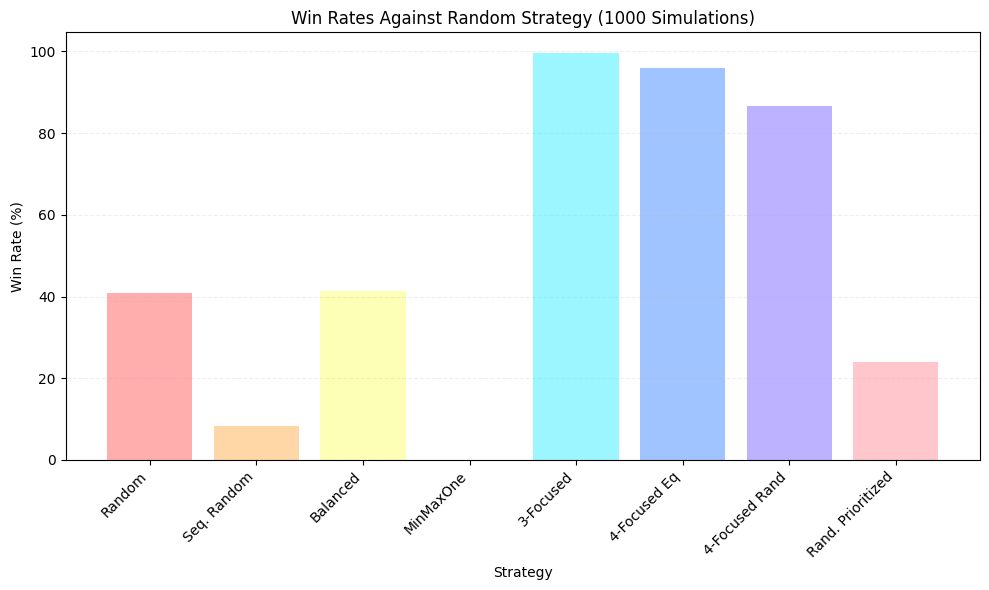

In [14]:
plt.figure(figsize=(10, 6))
strategy_labels = ["Random", "Seq. Random", "Balanced", "MinMaxOne", "3-Focused", "4-Focused Eq", "4-Focused Rand", "Rand. Prioritized"]
win_rate_values = [win_rates[strat] for strat in strategies]
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff', '#bdb2ff', '#ffc6cc']

plt.bar(strategy_labels, win_rate_values, color=colors)
plt.xlabel('Strategy')
plt.ylabel('Win Rate (%)')
plt.title(f'Win Rates Against Random Strategy ({num_games} Simulations)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tight_layout()

From the results, it appears that focusing on 3-4 fronts will have a win rate that is more than 60%. This could mean that if the opponent is always using random assignments of soldiers to fronts, it might be best to use a 3-front or 4-front focused strategy.

### All Possible Strategy Combinations

In [15]:
# Run simulations for all strategy combinations
win_rates = np.zeros((n, n))
non_loss_rates = np.zeros((n, n))

for i, p1_strat in enumerate(strategies):
    for j, p2_strat in enumerate(strategies):
        # print(f"Running simulation: P1 ({p1_strat}) vs P2 ({p2_strat})")
        win_rate, loss_rate, draw_rate, non_loss_rate = run_simulations(
            P1_strategy=p1_strat,
            P2_strategy=p2_strat,
            num_fronts=5,
            total_soldiers=100,
            num_games=num_games
        )
        win_rates[i, j] = win_rate
        non_loss_rates[i, j] = non_loss_rate

clear_output()        

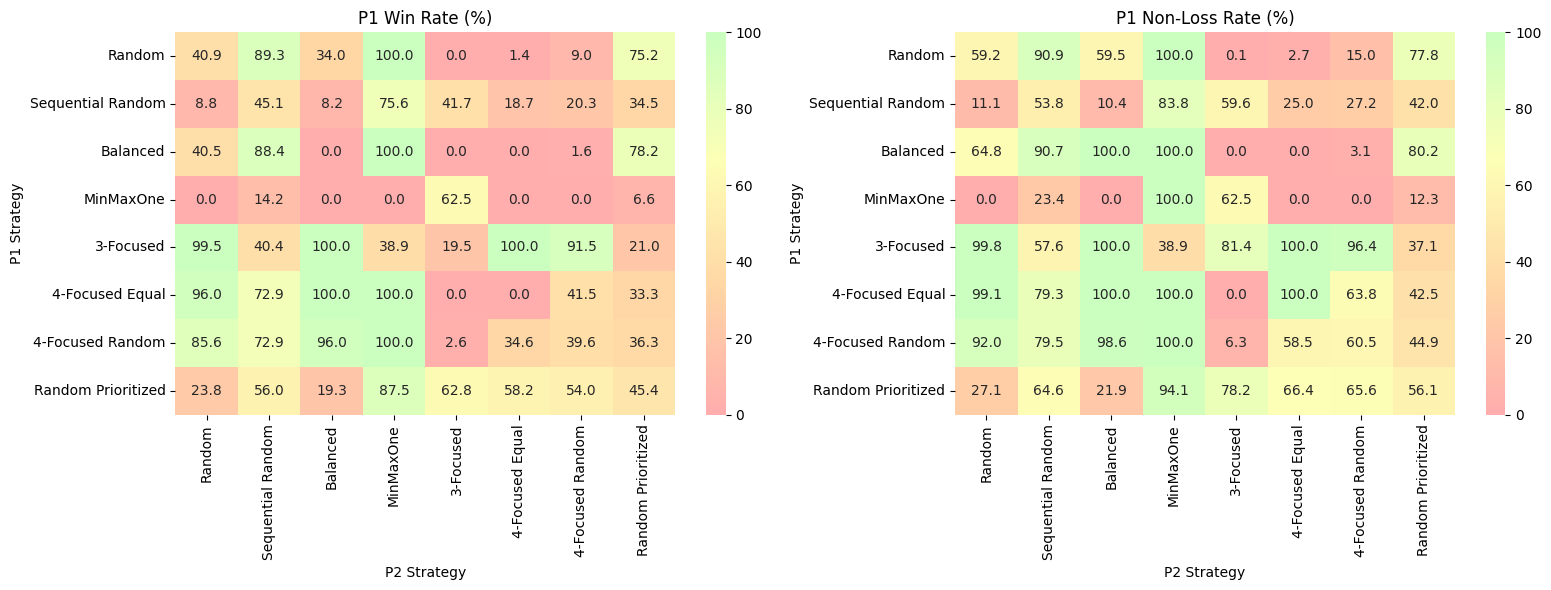

In [16]:
# Define custom colormap
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf']

custom = LinearSegmentedColormap.from_list("PastelRedGreen", colors)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Win Rate Heatmap
sns.heatmap(
    win_rates,
    annot=True,
    fmt=".1f",
    xticklabels=strategies,
    yticklabels=strategies,
    cmap=custom,
    vmin=0, vmax=100,
    ax=ax1
)
ax1.set_title("P1 Win Rate (%)")
ax1.set_xlabel("P2 Strategy")
ax1.set_ylabel("P1 Strategy")

# Non-Loss Rate Heatmap
sns.heatmap(
    non_loss_rates,
    annot=True,
    fmt=".1f",
    xticklabels=strategies,
    yticklabels=strategies,
    cmap=custom,
    vmin=0, vmax=100,
    ax=ax2
)
ax2.set_title("P1 Non-Loss Rate (%)")
ax2.set_xlabel("P2 Strategy")
ax2.set_ylabel("P1 Strategy")

plt.tight_layout()
plt.show()

The heatmap on the left shows that a 3-front focused strategy will almost always beat the random, balanced, 4-focused equal, and 4-focused random strategies. It only falls short when it is faced against sequential random, random prioritized, and other 3-focused strategies. This strategy beat the most opponent strategies so this can be a viable solution every game.

If we look at the heatmap on the right, the low win rate of a 3-focused strategy against another 3-focused strategy, apparently, is caused by a high draw percentage. If your gaming principle is "As long as the enemy doesn't win" then this can further support your cause to take on the 3-focused strategy.

Interestingly, while sequential random and random prioritized are a good "counter" for a 3-focused strategy, they don't generally perform well against other strategies.

## Best Strategy When Opponent Changes Strategies

In [17]:
def run_dynamic_simulation(sim, plot=False):
    """Runs a chosen dynamic Colonel Blotto simulations with adaptive opponent strategies.

    Simulates games for each predefined strategy against a chosen adaptive opponent:
      - random strategy switching (dynamic_simulation1)
      - copying P1’s allocation (dynamic_simulation2)
      - learning P1’s average allocation (dynamic_simulation3)
      
    Collects win rates and optionally plots them. Designed for a 5-front, 100-soldier game.

    Args:
        sim (callable, required): Chosen opponent strategy.
        plot (bool, optional): If True, plots win rates for each simulation using Matplotlib.
            Defaults to False.

    Returns:
        Nothing. Just shows a chart of win rates per P1 Strategy.
    """
    win_rates = {}

    for strat in strategies:
        win_rate = sim(p1_strat=strat, plot=plot)
        win_rates[strat] = win_rate
        
    plt.figure(figsize=(10, 6))
    strategy_labels = ["Random", "Seq. Random", "Balanced", "MinMaxOne", "3-Focused", "4-Focused Eq", "4-Focused Rand", "Rand. Prioritized"]
    win_rate_values = [win_rates[strat] for strat in strategies]
    colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff', '#bdb2ff', '#ffc6cc']

    plt.bar(strategy_labels, win_rate_values, color=colors)
    plt.xlabel("Strategy")
    plt.ylabel("Win Rate (%)")
    plt.title(f"Win Rates Against Opponent's Strategy Over {num_games:,} Games")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.2)
    plt.tight_layout()

### P1 Sticks to One Strategy; P2 Changes to Randomly Selected Strategy Upon Loss or Draw

In [18]:
def dynamic_simulation1(num_games=num_games, num_fronts=5, total_soldiers=100, p1_strat="3-Focused", plot=False):
    """Simulates Colonel Blotto games with P2 randomly changing strategies after non-wins.

    Runs games where Player 1 uses a fixed strategy, and Player 2 starts with a random strategy
    and switches to another random strategy after any non-winning game (loss or draw). Tracks
    results and P2’s strategy usage. Designed for a 5-front, 100-soldier game by default.

    Args:
        num_games (int, optional): Number of games to simulate. Defaults to 1000.
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers per player. Defaults to 100.
        p1_strat (str, optional): Player 1’s strategy, one of: 'Random', 'Sequential Random',
            'Balanced', 'MinMaxOne', '3-Focused', '4-Focused Equal', '4-Focused Random',
            'Random Prioritized'. Defaults to '3-Focused'.
        plot (bool, optional): If True, plots P1’s cumulative win rate. Defaults to False.

    Returns:
        float: Player 1’s win rate (percentage).
    """
    results = {"P1 WINS": 0, "P2 WINS": 0, "DRAW": 0}
    p2_strategy_usage = defaultdict(int)
    game_history = []
    cumulative_wins = []
    wins_so_far = 0
    
    p1_func = strategy_map[p1_strat]
    p2_current_strategy = np.random.choice(strategies)
    p2_func = strategy_map[p2_current_strategy]
    
    for game in range(num_games):
        p1_alloc = p1_func(num_fronts, total_soldiers)
        p2_alloc = p2_func(num_fronts, total_soldiers)
        _, _, outcome = initialize_game(p1_alloc, p2_alloc, num_fronts, total_soldiers)
        results[outcome] += 1
        p2_strategy_usage[p2_current_strategy] += 1
        game_history.append((game + 1, p1_strat, p2_current_strategy, outcome))
        
        # Cumulutaive Wins Tracker
        if outcome == "P1 WINS":
            wins_so_far += 1
        cumulative_wins.append((wins_so_far / (game + 1)) * 100)
        
        # Change Strategy for P2
        if outcome != "P2 WINS":
            available_strategies = [s for s in strategies if s != p2_current_strategy]
            p2_current_strategy = np.random.choice(available_strategies)
            p2_func = strategy_map[p2_current_strategy]
            
    # Compute overall rates for Player 1
    wins = results["P1 WINS"]
    losses = results["P2 WINS"]
    ties = results["DRAW"]
    win_rate = (wins / num_games) * 100
    non_loss_rate = ((wins + ties) / num_games) * 100
    
    # Print summary
    print(f"\nRandom Strategy Change Simulation Results, P1 ({p1_strat}) ({num_games:,} Games):")
    print(f"  Player 1 Wins: {wins} ({win_rate:.2f}%)")
    print(f"  Player 2 Wins: {losses} ({(losses / num_games) * 100:.2f}%)")
    print(f"  Ties: {ties} ({(ties / num_games) * 100:.2f}%)")
    print(f"  Player 1 Non-Loss Rate: {non_loss_rate:.2f}%")
    print("\nPlayer 1 Strategy Usage:")
    print(f"  {p1_strat}: {num_games} games (100.00%)")
    print("\nPlayer 2 Strategy Usage:")
    for strat, count in sorted(p2_strategy_usage.items(), key=lambda x: x[1], reverse=True):
        print(f"  {strat}: {count} games ({(count / num_games) * 100:.2f}%)")
        
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, num_games + 1), cumulative_wins, color='#1f77b4', label='Cumulative Win Rate', lw=3)
        plt.xlabel('Game Number')
        plt.ylabel('Cumulative Rates (%)')
        plt.title(f'Player 1 ({p1_strat}) vs Random Strategy Change Opponent Over {num_games:,} Games')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
    return win_rate


Random Strategy Change Simulation Results, P1 (Random) (1,000 Games):
  Player 1 Wins: 9 (0.90%)
  Player 2 Wins: 986 (98.60%)
  Ties: 5 (0.50%)
  Player 1 Non-Loss Rate: 1.40%

Player 1 Strategy Usage:
  Random: 1000 games (100.00%)

Player 2 Strategy Usage:
  3-Focused: 957 games (95.70%)
  4-Focused Equal: 30 games (3.00%)
  Random: 7 games (0.70%)
  Random Prioritized: 2 games (0.20%)
  4-Focused Random: 2 games (0.20%)
  Balanced: 1 games (0.10%)
  MinMaxOne: 1 games (0.10%)

Random Strategy Change Simulation Results, P1 (Sequential Random) (1,000 Games):
  Player 1 Wins: 194 (19.40%)
  Player 2 Wins: 745 (74.50%)
  Ties: 61 (6.10%)
  Player 1 Non-Loss Rate: 25.50%

Player 1 Strategy Usage:
  Sequential Random: 1000 games (100.00%)

Player 2 Strategy Usage:
  Balanced: 352 games (35.20%)
  Random: 208 games (20.80%)
  4-Focused Random: 126 games (12.60%)
  4-Focused Equal: 109 games (10.90%)
  Sequential Random: 59 games (5.90%)
  3-Focused: 54 games (5.40%)
  Random Prioritized:

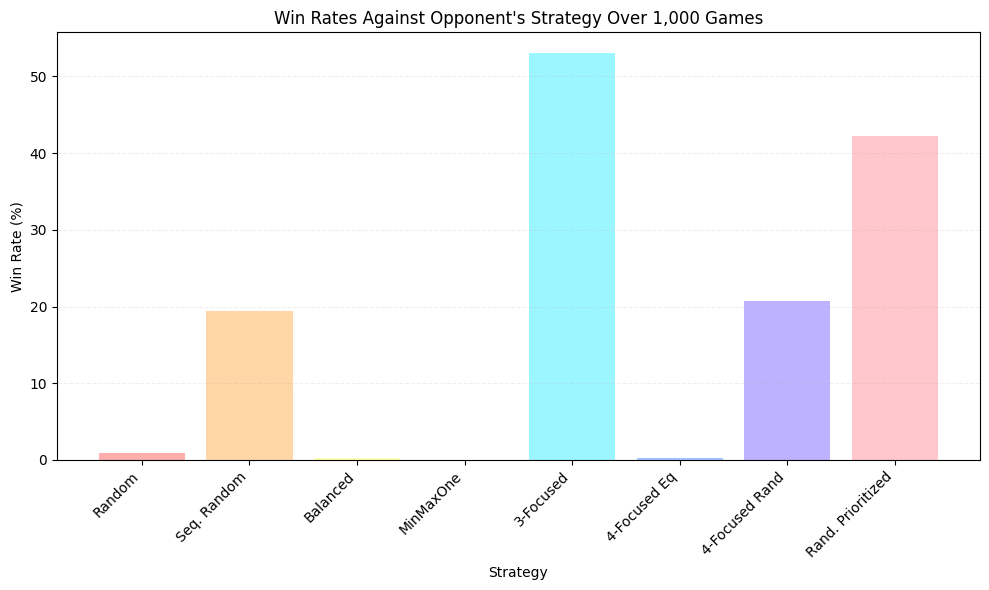

In [19]:
run_dynamic_simulation(sim=dynamic_simulation1)

The 3-Focused strategy proves that consistency can beat adaptability. With a >50% win rate and a >60% non-loss rate, it performs strongly against an opponent that changes strategies after every loss or tie. Even as the opponent rotates through a range of tactics, most often choosing Random Prioritized and MinMaxOne, the 3-Focused approach maintains control. Rather than constantly shifting strategies to counter each new threat, it applies steady pressure. In this kind of reactive environment, a focused and assertive strategy can still be viable like the 3-Focused strategy.

### P1 Sticks to One Strategy; P2 Copies the Previous Allocation of P1 Upon a Loss or Draw, Repeats Allocation on a Win

In [20]:
def dynamic_simulation2(num_games=1000, num_fronts=5, total_soldiers=100, p1_strat="3-Focused", plot=False):
    """Simulates Colonel Blotto games with P2 copying P1’s previous allocation or reusing a winning allocation.

    Runs games where Player 1 uses a fixed strategy, and Player 2 either reuses a winning allocation
    or copies P1’s previous allocation after a non-win. Tracks results and P2’s strategy usage.
    Designed for a 5-front, 100-soldier game by default.

    Args:
        num_games (int, optional): Number of games to simulate. Defaults to 1000.
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers per player. Defaults to 100.
        p1_strat (str, optional): Player 1’s strategy, one of: 'Random', 'Sequential Random',
            'Balanced', 'MinMaxOne', '3-Focused', '4-Focused Equal', '4-Focused Random',
            'Random Prioritized'. Defaults to '3-Focused'.
        plot (bool, optional): If True, plots P1’s cumulative win rate. Defaults to False.

    Returns:
        float: Player 1’s win rate (percentage).
    """
    results = {"P1 WINS": 0, "P2 WINS": 0, "DRAW": 0}
    p2_strategy_usage = defaultdict(int)
    game_history = []
    cumulative_wins = []
    wins_so_far = 0
    
    p1_func = strategy_map[p1_strat]
    p2_current_strategy = np.random.choice(strategies)
    p2_func = strategy_map[p2_current_strategy]
    previous_p1_alloc = None  # To store P1's allocation from the previous game
    p2_fixed_alloc = None  # To store P2's allocation when winning
    
    for game in range(num_games):
        p1_alloc = p1_func(num_fronts, total_soldiers)        
        if p2_fixed_alloc is not None:
            p2_alloc = p2_fixed_alloc
            current_strategy_label = p2_current_strategy
        elif previous_p1_alloc is not None and p2_current_strategy == "Copy P1":
            p2_alloc = previous_p1_alloc
            current_strategy_label = "Copy P1"
        else:
            p2_alloc = p2_func(num_fronts, total_soldiers)
            current_strategy_label = p2_current_strategy
            
        _, _, outcome = initialize_game(p1_alloc, p2_alloc, num_fronts, total_soldiers)
        results[outcome] += 1
        p2_strategy_usage[current_strategy_label] += 1
        game_history.append((game + 1, {p1_strat}, current_strategy_label, outcome))
        
        # Cumulative Wins Tracker
        if outcome == "P1 WINS":
            wins_so_far += 1
        cumulative_wins.append((wins_so_far / (game + 1)) * 100)
        
        previous_p1_alloc = p1_alloc.copy()
        
        if outcome == "P2 WINS":
            p2_fixed_alloc = p2_alloc.copy()
        else:
            p2_current_strategy = "Copy P1"
            p2_func = None
            p2_fixed_alloc = None
            
    # Compute overall rates for Player 1
    wins = results["P1 WINS"]
    losses = results["P2 WINS"]
    ties = results["DRAW"]
    win_rate = (wins / num_games) * 100
    non_loss_rate = ((wins + ties) / num_games) * 100
    
    # Print summary
    print(f"\nCopying Opponent Simulation Results, P1 ({p1_strat}) ({num_games:,} Games):")
    print(f"  Player 1 Wins: {wins} ({win_rate:.2f}%)")
    print(f"  Player 2 Wins: {losses} ({(losses / num_games) * 100:.2f}%)")
    print(f"  Ties: {ties} ({(ties / num_games) * 100:.2f}%)")
    print(f"  Player 1 Non-Loss Rate: {non_loss_rate:.2f}%")
    print("\nPlayer 1 Strategy Usage:")
    print(f"  {p1_strat}: {num_games} games (100.00%)")
    print("\nPlayer 2 Strategy Usage:")
    for strat, count in sorted(p2_strategy_usage.items(), key=lambda x: x[1], reverse=True):
        print(f"  {strat}: {count} games ({(count / num_games) * 100:.2f}%)")
        
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, num_games + 1), cumulative_wins, color='#1f77b4', label='Cumulative Win Rate', lw=3)
        plt.xlabel('Game Number')
        plt.ylabel('Cumulative Win Rate (%)')
        plt.title(f'Player 1 ({p1_strat}) vs Copying Opponent Over {num_games:,} Games')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
    return win_rate
    


Copying Opponent Simulation Results, P1 (Random) (1,000 Games):
  Player 1 Wins: 40 (4.00%)
  Player 2 Wins: 932 (93.20%)
  Ties: 28 (2.80%)
  Player 1 Non-Loss Rate: 6.80%

Player 1 Strategy Usage:
  Random: 1000 games (100.00%)

Player 2 Strategy Usage:
  3-Focused: 884 games (88.40%)
  Copy P1: 116 games (11.60%)

Copying Opponent Simulation Results, P1 (Sequential Random) (1,000 Games):
  Player 1 Wins: 268 (26.80%)
  Player 2 Wins: 677 (67.70%)
  Ties: 55 (5.50%)
  Player 1 Non-Loss Rate: 32.30%

Player 1 Strategy Usage:
  Sequential Random: 1000 games (100.00%)

Player 2 Strategy Usage:
  Copy P1: 999 games (99.90%)
  3-Focused: 1 games (0.10%)

Copying Opponent Simulation Results, P1 (Balanced) (1,000 Games):
  Player 1 Wins: 1 (0.10%)
  Player 2 Wins: 0 (0.00%)
  Ties: 999 (99.90%)
  Player 1 Non-Loss Rate: 100.00%

Player 1 Strategy Usage:
  Balanced: 1000 games (100.00%)

Player 2 Strategy Usage:
  Copy P1: 999 games (99.90%)
  MinMaxOne: 1 games (0.10%)

Copying Opponent Si

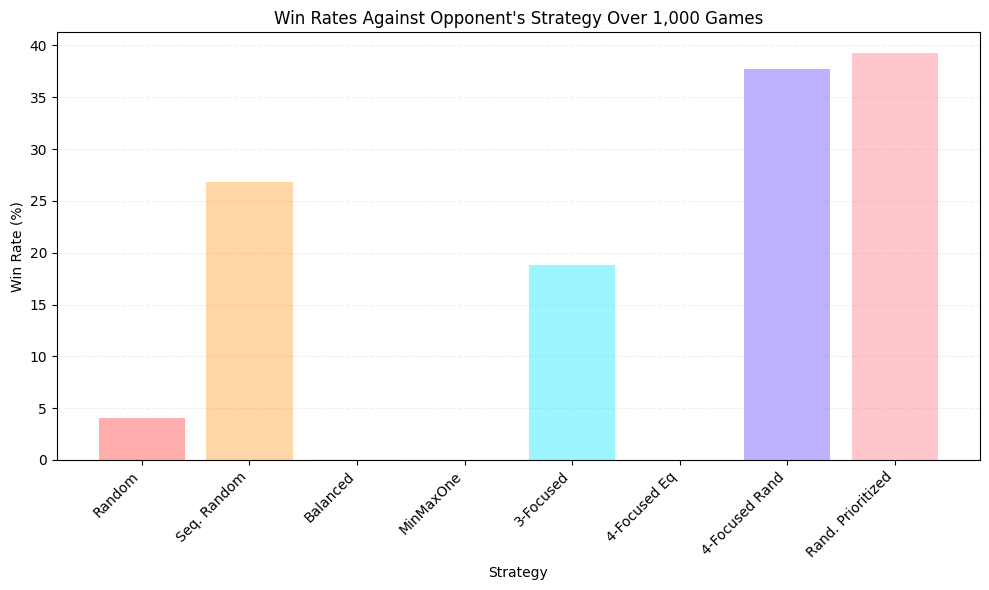

In [21]:
run_dynamic_simulation(sim=dynamic_simulation2)

Playing with a copycat opponent is a losing game. The best-performing strategies here barely get a 40% win rate, and most get knockedout completely on or get locked into stalemates. Even the main contender, 3-Focused, can’t break the ~20% win rate because the opponent just mirrors our moves like a toxic ex who can't find their own personality. Haha. Strategies with randomness manage to dodge the worst of it, but still can't push past the 50% win rate. At the end of the day, we aren't outplaying this opponent by playing ore games. Maybne the smartest move is to walk away when you're lucky enough to be ahead in the first few games.

### P1 Sticks to One Strategy; P2 Learns from P1's Past Allocations

In [22]:
def learning_opponent_strategy(num_fronts=5, total_soldiers=100, history=None, game_num=0, memory=10):
    """Opponent strategy that learns P1’s average allocation for a Colonel Blotto game.

    If insufficient history or early in the game, uses random_strategy. Otherwise, allocates
    soldiers to ceil(num_fronts / 2) fronts based on P1’s average allocations over the last
    memory games, ensuring a win by targeting enough fronts. The sum equals total_soldiers.

    Args:
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers to allocate. Defaults to 100.
        history (list, optional): List of P1’s past allocations. Defaults to None.
        game_num (int, optional): Current game number. Defaults to 0.
        memory (int, optional): Number of past games to consider. Defaults to 10.

    Returns:
        list: A list of non-negative integers summing to total_soldiers, targeting
              ceil(num_fronts / 2) fronts based on P1’s average allocation or random if early.
    """
    
    if history is None or len(history) < memory or game_num < memory:
        # Use random strategy for early games or if insufficient history
        return random_strategy(num_fronts, total_soldiers)
    # else:
    #     print("Starting Allocations Based on Learnings")
    
    # Calculate average allocation from last 'memory' games
    num_priority_fronts = ceil(num_fronts / 2)
    recent_history = history[-memory:]
    avg_allocation = [sum(front) / len(recent_history) for front in zip(*recent_history)]
    # print(f"Average Allocation: {avg_allocation}")
    
    allocation = [0] * num_fronts
    
    for i, avg in enumerate(avg_allocation[:num_priority_fronts]):
        sum_ = sum(avg_allocation[:num_priority_fronts])
        proportion = avg/sum_
        allocation[i] = int(proportion*100)+1

    if sum(allocation) > 100:
        allocation[num_priority_fronts-1] = allocation[num_priority_fronts-1] - (sum(allocation)-100)
    else:
        allocation[num_priority_fronts-1] = allocation[num_priority_fronts-1] + (100-sum(allocation))
        
    return allocation

In [23]:
def dynamic_simulation3(num_games=1000, num_fronts=5, total_soldiers=100, p1_strat="3-Focused", plot=False):
    """Simulates Colonel Blotto games with P2 learning P1’s average allocation.

    Runs games where Player 1 uses a fixed strategy, and Player 2 uses learning_opponent_strategy,
    which adapts to P1’s average allocations over recent games. Tracks results and P1’s cumulative
    win rate. Designed for a 5-front, 100-soldier game by default.

    Args:
        num_games (int, optional): Number of games to simulate. Defaults to 1000.
        num_fronts (int, optional): Number of battlefronts. Defaults to 5.
        total_soldiers (int, optional): Total soldiers per player. Defaults to 100.
        p1_strat (str, optional): Player 1’s strategy, one of: 'Random', 'Sequential Random',
            'Balanced', 'MinMaxOne', '3-Focused', '4-Focused Equal', '4-Focused Random',
            'Random Prioritized'. Defaults to '3-Focused'.
        plot (bool, optional): If True, plots P1’s cumulative win rate. Defaults to False.

    Returns:
        float: Player 1’s win rate (percentage).
    """
    
    results = {"P1 WINS": 0, "P2 WINS": 0, "DRAW": 0}
    p1_history = []
    cumulative_wins = []
    wins_so_far = 0
    
    p1_func = strategy_map[p1_strat]
    
    for game in range(num_games):
        p1_alloc = p1_func(num_fronts, total_soldiers)
        p2_alloc = learning_opponent_strategy(num_fronts, total_soldiers, p1_history, game)
        _, _, outcome = initialize_game(p1_alloc, p2_alloc, num_fronts, total_soldiers)
        results[outcome] += 1
        p1_history.append(p1_alloc)
        
        if outcome == "P1 WINS":
            wins_so_far += 1
        cumulative_wins.append((wins_so_far / (game + 1)) * 100)
        
        # print(f"{p1_alloc} vs {p2_alloc}: {outcome}")
    
    # Compute rates
    wins = results["P1 WINS"]
    losses = results["P2 WINS"]
    ties = results["DRAW"]
    win_rate = (wins / num_games) * 100
    non_loss_rate = ((wins + ties) / num_games) * 100
    
    # Print summary
    print(f"\nLearning Opponent Simulation Results ({num_games:,} Games):")
    print(f"  P1 ({p1_strat}) Wins: {wins} ({win_rate:.2f}%)")
    print(f"  P2 (Learning) Wins: {losses} ({(losses / num_games) * 100:.2f}%)")
    print(f"  Ties: {ties} ({(ties / num_games) * 100:.2f}%)")
    print(f"  P1 Non-Loss Rate: {non_loss_rate:.2f}%")
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, num_games + 1), cumulative_wins, color='#1f77b4', label='Cumulative Win Rate', lw=3)
        plt.xlabel('Game Number')
        plt.ylabel('Cumulative Win Rate (%)')
        plt.title(f'Player 1 ({p1_strat}) vs Learning Opponent Over {num_games:,} Games')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    return win_rate


Learning Opponent Simulation Results (1,000 Games):
  P1 (Random) Wins: 12 (1.20%)
  P2 (Learning) Wins: 980 (98.00%)
  Ties: 8 (0.80%)
  P1 Non-Loss Rate: 2.00%

Learning Opponent Simulation Results (1,000 Games):
  P1 (Sequential Random) Wins: 462 (46.20%)
  P2 (Learning) Wins: 357 (35.70%)
  Ties: 181 (18.10%)
  P1 Non-Loss Rate: 64.30%

Learning Opponent Simulation Results (1,000 Games):
  P1 (Balanced) Wins: 2 (0.20%)
  P2 (Learning) Wins: 997 (99.70%)
  Ties: 1 (0.10%)
  P1 Non-Loss Rate: 0.30%

Learning Opponent Simulation Results (1,000 Games):
  P1 (MinMaxOne) Wins: 628 (62.80%)
  P2 (Learning) Wins: 360 (36.00%)
  Ties: 12 (1.20%)
  P1 Non-Loss Rate: 64.00%

Learning Opponent Simulation Results (1,000 Games):
  P1 (3-Focused) Wins: 307 (30.70%)
  P2 (Learning) Wins: 306 (30.60%)
  Ties: 387 (38.70%)
  P1 Non-Loss Rate: 69.40%

Learning Opponent Simulation Results (1,000 Games):
  P1 (4-Focused Equal) Wins: 70 (7.00%)
  P2 (Learning) Wins: 852 (85.20%)
  Ties: 78 (7.80%)
  P1

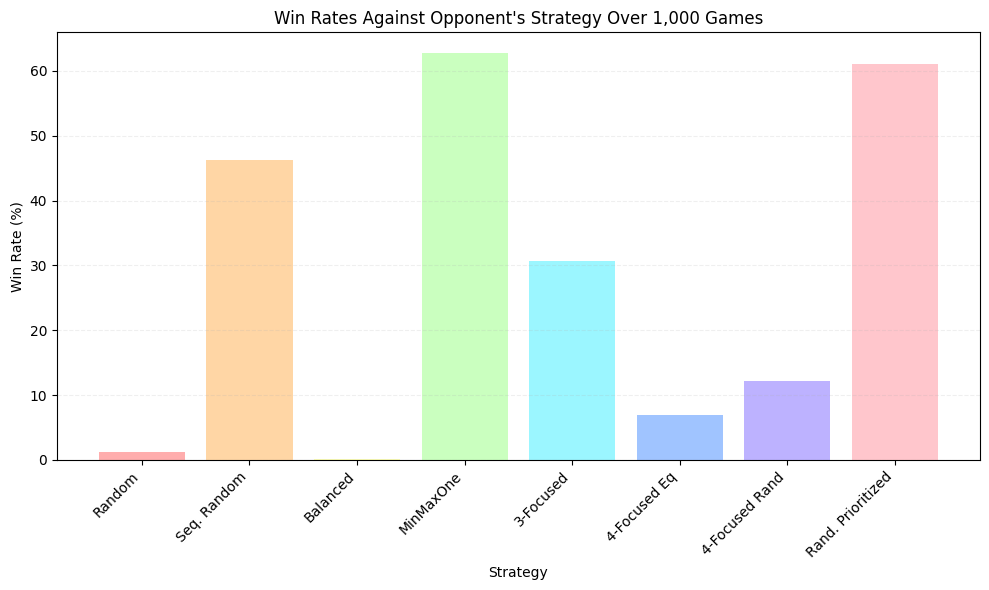

In [24]:
run_dynamic_simulation(sim=dynamic_simulation3)

Against an opponent that averages the last 10 moves and heavily front-loads the first three fronts to exploit that trend, most strategies lose because they repeat patterns. Random, Balanced, and 4-Focused (Equal and Random) are easy targets. However, Random Prioritized got a >60% win rate blending unpredictability with focused force, so there's really not much stable patterns to learn. MinMaxOne and Sequential Random also do well probably because of the constant shuffling after a skewed allcoation. So I guess the winning strategy when faced with a smart opponent is to have some sort of unpredictability but maintain some structure if that makes sense.

# Questions:
1. Which allocation strategy led to the most victories?
    - If going against a stick-to-random allocation, 3-Foucsed strategy had the best performance in terms of win rates.
2. Was focusing on specific fronts more effective than spreading thin?
    - It was clear that it was easier to win by focusing on specific fronts rather than spreading thin. It's very much like a true war. Lose some battles to win the war.
3. Did randomness from the opponent make it hard to predict?
    - Opponent using randomness in allocating, turned out to be easier to beat. In fact, a s-Focused strategy almost always wins agains a random allocation strategy.
    - Opponent randomness in changing strategies every battle, slightly more difficult to get a high win rate, but the steady 3-Focused strategy still gets about ~50% win rate.
4. How would you adapt your strategy if the opponent also learned from past rounds?
    - Based on simulations, it's still viable to stick with one strategy across all battles and get a decent win rate. You just have to know exactly what the opponent is doing, or rather understand how it's adapting for every new round.
5. What would you change if you played against a strategic (non-random) opponent?
    - Outside allocation strategies, of course, mind games, bluffs, and trash talking will be part of my strategy. Hahaha.
    - If I know they're tracking my allocations, then I would throw them off by going completely the other way. Skew their data. Confuse them.
    - I'll do my best to try and stick to one strategy like what the simulations say (just gotta figure them out a bit), but I would try to adapt as well based on what the opponent is doing. However, that is quite difficult without full knowledge of what the other is thinking.
    - For a one-shot Colonel Blotto against a non-random person whom I have no prior knowledge about, I'll still go for a 3-Focused allocation. They might think the same so the probability of winning is about 20% (lowest across all strategies I laid), but so is the probability of losing. And I'm not mad at that odds.

*P.S. Docstrings mostly brought to you by Grok.*